# Plot predictions from neural network

Import necessary functions

In [1]:
import sys 
import os
sys.path.append(os.path.relpath("../code/"))
from data import *
from model import *

Using TensorFlow backend.
/home/jiamin/miniconda/envs/tf_gpu_cuda10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jiamin/miniconda/envs/tf_gpu_cuda10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jiamin/miniconda/envs/tf_gpu_cuda10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

## Get data
Import `.npy` data files for input, ground truth and prediction

In [16]:
# Parameters
width = 256
height = 256
slices = 20
channels = 4
train_path = '../npy_data/train/'
test_path = '../npy_data/test/'

params = {'IMG_WIDTH' : width,
          'IMG_HEIGHT' : height,
          'NUM_SLICES' : slices,
          'IMG_CHANNELS' : channels,
          'TRAIN_PATH' : train_path,
          'TEST_PATH' : test_path}

(X_train, X_test, y_train, y_test) = get_data(**params)

preds_train = np.load(train_path+'preds/preds_train_'+str(channels)+'ch.npy')
preds_test = np.load(test_path+'preds/preds_test_'+str(channels)+'ch.npy')


100%|██████████| 8/8 [00:00<00:00, 49.62it/s]


Done!


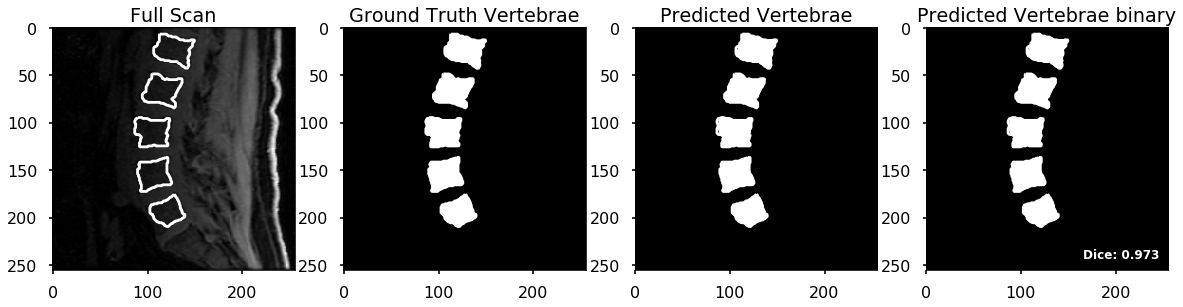

In [11]:
# Check if training data looks all right
plot_sample(X_train, y_train, preds_train, preds_train_t) #ix = 10
plt.savefig('training_preds.pdf', dpi=300)

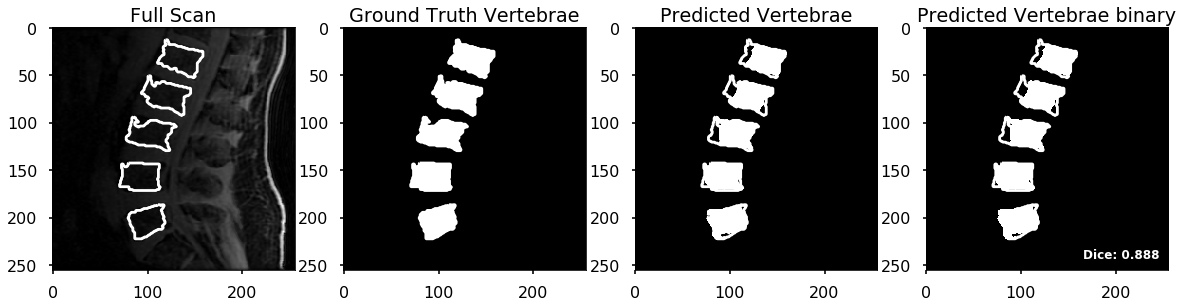

In [24]:
# Check if testing data looks all right
plot_sample(X_test, y_test, preds_test, preds_test_t) #ix = 10
plt.savefig('testing_preds.pdf', dpi=300)

In [17]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_train.flatten(), preds_train.flatten())
roc_auc = auc(fpr, tpr)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.flatten(), preds_test.flatten())
roc_auc_test = auc(fpr_test, tpr_test)
print(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_train.flatten(), preds_train.flatten())
precision_test, recall_test, _ = precision_recall_curve(y_test.flatten(), preds_test.flatten())

[0.00000000e+00 7.43935741e-04 7.55586006e-04 ... 2.56398186e-03
 2.60785979e-03 1.00000000e+00] [0.         0.90986762 0.91162526 ... 0.97023545 0.97056978 1.        ]


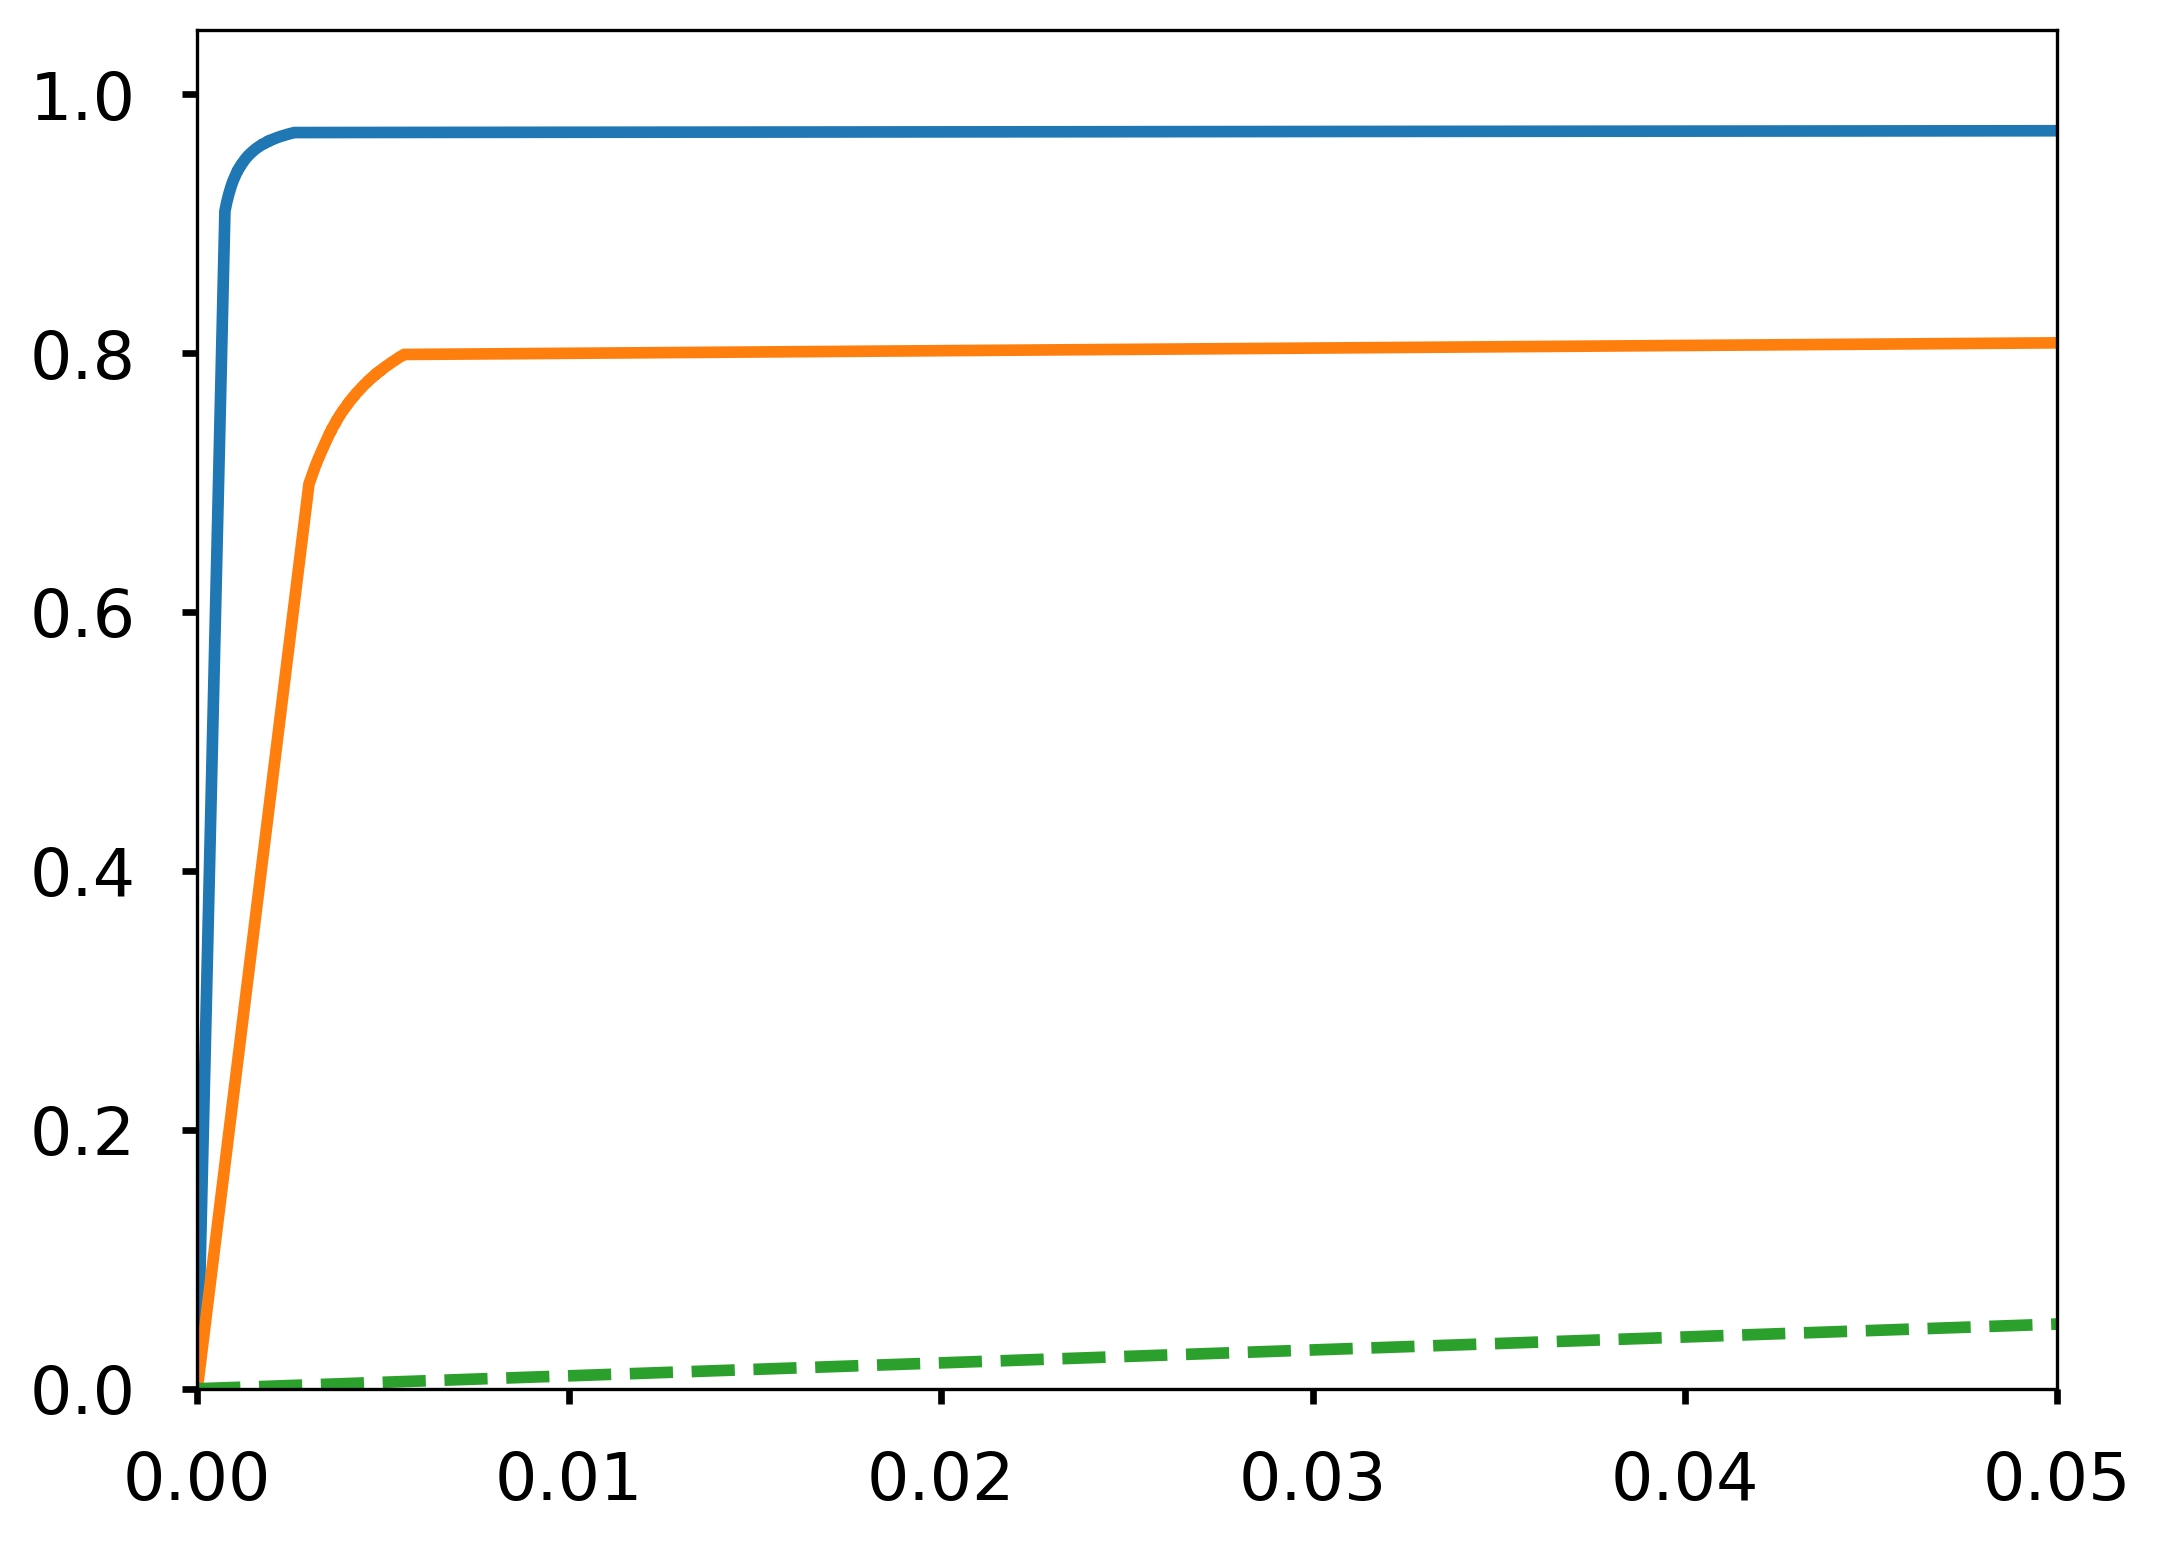

In [21]:
plt.figure(figsize=(8, 6), dpi=300)
lw = 2
plt.plot(fpr, tpr, #color='darkorange', lw=lw,
         label='Training (area = %0.2f)' % roc_auc)
plt.plot(fpr_test, tpr_test, #color='darkorange', lw=lw,
         label='Validation (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')#, color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc="lower right")
plt.savefig('ROC_curve.pdf', dpi=300)
plt.show()

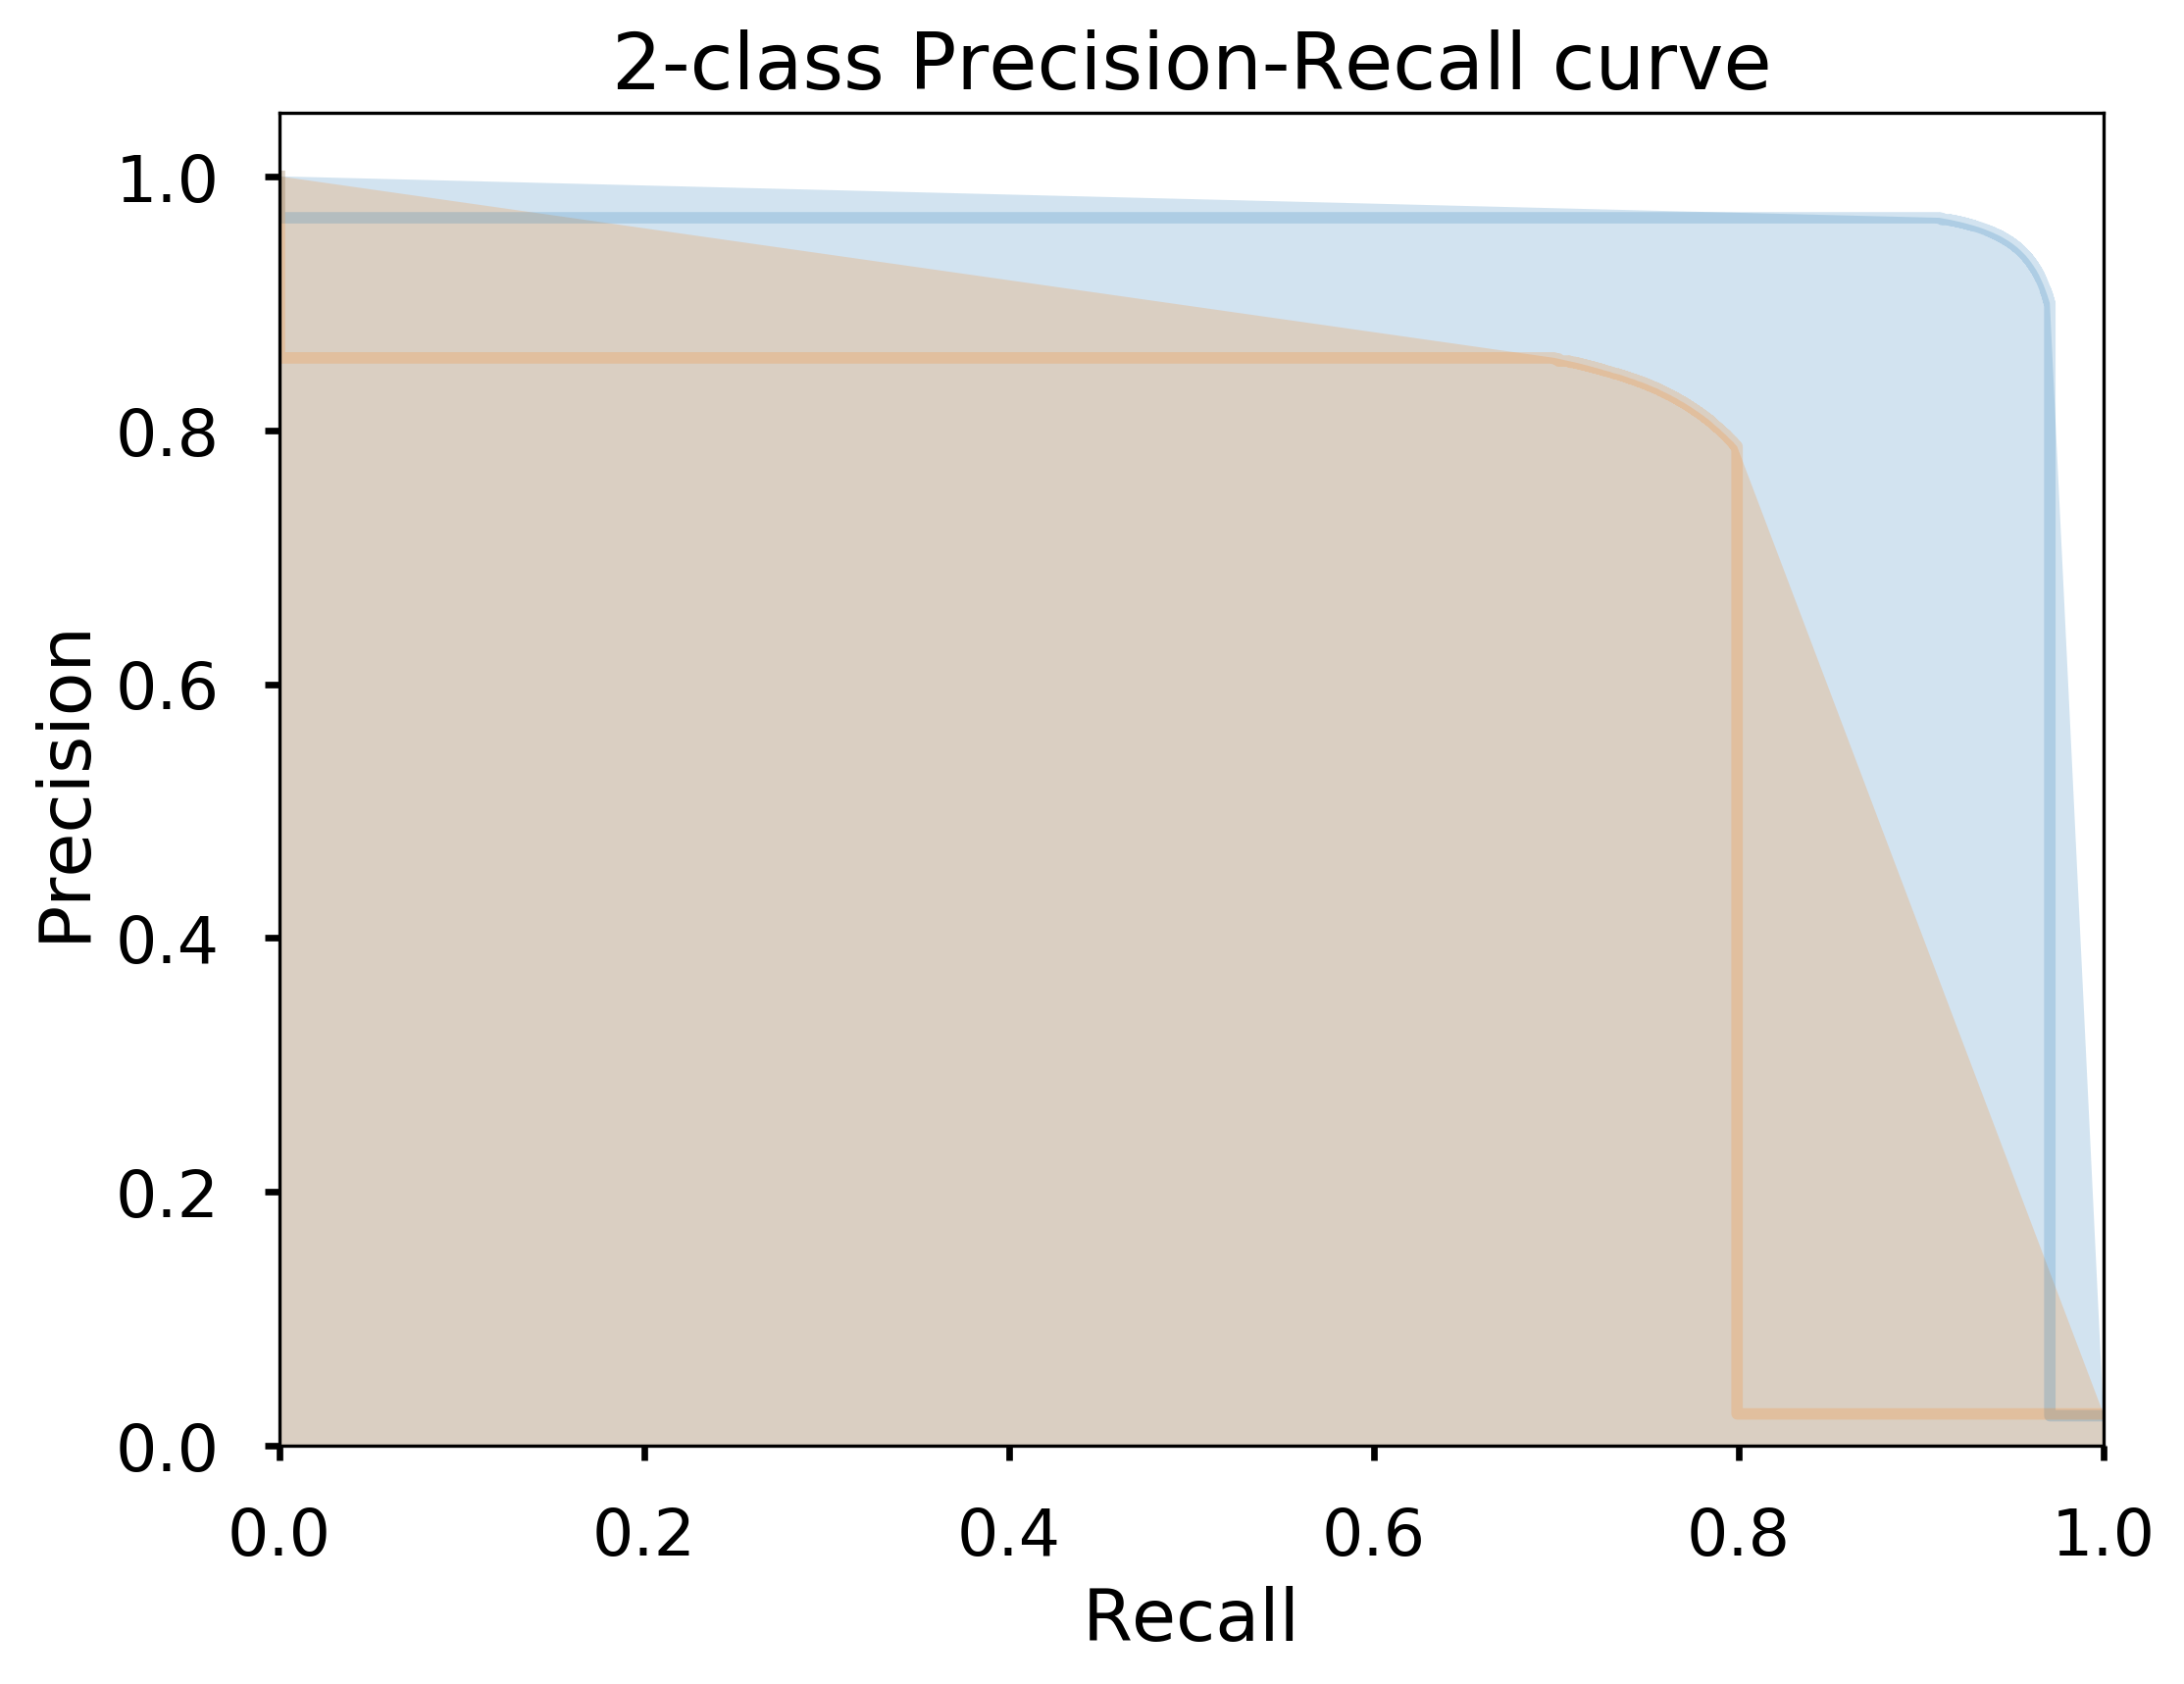

In [26]:
from inspect import signature
plt.figure(figsize=(8, 6), dpi=300)
plt.step(recall, precision, alpha=0.2,
         where='post', label='Training')
plt.fill_between(recall, precision, alpha=0.2)
plt.step(recall_test, precision_test, alpha=0.2,
         where='post', label='Validation')
plt.fill_between(recall_test, precision_test, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.savefig('PR_curve.pdf', dpi=300)

In [8]:
print(classification_report(y_train.flatten(), preds_train_t.flatten()))
print(classification_report(y_test.flatten(), preds_test_t.flatten()))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00  42230798
        True       0.94      0.95      0.95   1022962

    accuracy                           1.00  43253760
   macro avg       0.97      0.98      0.97  43253760
weighted avg       1.00      1.00      1.00  43253760

              precision    recall  f1-score   support

       False       0.99      1.00      0.99  10222626
        True       0.83      0.77      0.79    263134

    accuracy                           0.99  10485760
   macro avg       0.91      0.88      0.89  10485760
weighted avg       0.99      0.99      0.99  10485760



So far, good at predicting what's not vertebrae, not as good on what actually is vertebrae. Classes are also unbalanced as well - most of an image would be classified as "not vertebrae"